## Computer Exercise \#03: Support Vector Machines



### Instructions ###

Included below is the basic code for this computer exercise that is given in the writeup for your experiments.
You will need to make changes and modifications to perform the experiements and to experiment with other ideas.  

### Common Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
np.random.seed(42)

### Plotting Function ###

### Questions p.2
1. SVC class finds the max margin classifier by solving the dual optimization problem below. We know the algorithm is solving the dual problem because if you pass a callable to the kernel parameter it computes a matrix of size (n_samples, n_samples) which is the size of dual matrix as opposed to the primal matrix which is based on feature size. Additionally, the decision function incorporates the dual coefficients.
$$\begin{gather*}
\underset{\alpha}{min} \; \frac{1}{2}\alpha^TQ\alpha - e^T\alpha \; \text{subject to}\; y^T\alpha = 0\text{;}\; 0 \le \alpha_i \le C, i = 1, \ldots, n \\
e \text{ is a vector of 1} \\
Q \text{ is n by n positive semidefinite matrix} \\
\text{Each element of Q is } y_iy_jK(x_i, x_j) \\
\text{K is the kernel function which is by default the readial basis function (Gaussian)} \\
\alpha_i \;\text{are the dual coefficients }\\
\text{The decision function for x is}\; \sum_{i\epsilon \;SV}y_i\alpha_iK(x_i,x) + b
\end{gather*}$$
2. LinearSVC is a faster SVM implementation using a linear kernel as opposed to the Gaussian kernel in SVC and using a squared hinge loss as a default as opposed to the hinge loss function of SVC. Otherwise, it still solving the optimization problem above, but the programmer can select whether the class solves the primal or dual problem. This class should be used for larger datasets. SGDClassifier fits an SVM using stoachastic gradient descent and turns the problem into an unconstrained optimization problem. This classifier should be used for large, sparse datasets and/or large deature space dimensions.

In [2]:
#
# Plot the decision function for a classifier clf
#    Optional argument, SV, if set to 1 will plot the support vectors
#    For data sets with many support vectors, it is best to keep SV=0
#
def plot_classifier(X,y,title,save_name,classifier,sv=0):   #Default value sv=0: Do not show vectors
    data = pd.DataFrame(X,columns=["x1","x2"])
    sns.scatterplot(x="x1", y="x2", data=data, hue=y, palette=['red','blue'])
    # plot the decision function
    ax = plt.gca()
    ax.set_title(f"{title}")
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = classifier.decision_function(xy).reshape(XX.shape)
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
    # plot support vectors
    if(sv==1):
        ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
    plt.savefig(f"{save_name}.jpg")

### Make Dataset ###

In [3]:
from sklearn.datasets import make_classification
# Generate random n-class classification problem
# n_features: total number of features
# n_redundant: number of redundant features generated as random linear combo 
# of informative features
# n_informative: number of informative features. Each class is guassian cluster 
# located around hypercube vertices. Each cluster,
# infromative features drawn independently N(0,1) then randomly linearly combined 
# within each cluster add covariance
# Clusters placed on vertices of hypercube
# n_clusters: Number of clusters per class
# class_sep: Factor multiplying hypercube size, larger values spread out clusters make classification easier
X, y = make_classification(n_features=2, n_samples=200,n_redundant=0, n_informative=2,
                           n_clusters_per_class=2,class_sep=1,random_state=12)   

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X, y)

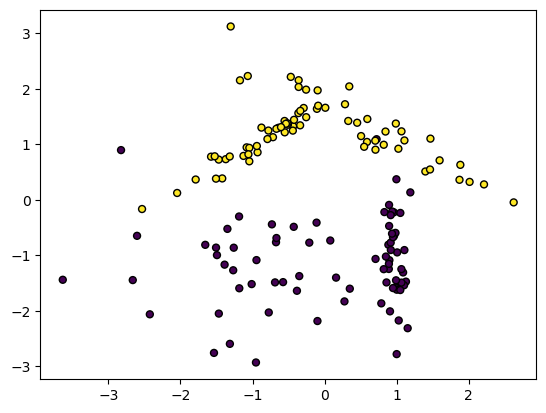

In [5]:
plt.scatter(X_train[:,0],X_train[:,1],marker="o",c=y_train,s=25,edgecolor="k");

### Soft Margin Linear SVM

In [6]:
clf = SVC(kernel='linear')    # Default value of C=1
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
print(f"The accuracy of the classifier is:\nTraining: {clf.score(X_train, y_train)}\nTest:{clf.score(X_test,y_test)}")

The accuracy of the classifier is:
Training: 0.9666666666666667
Test:0.86


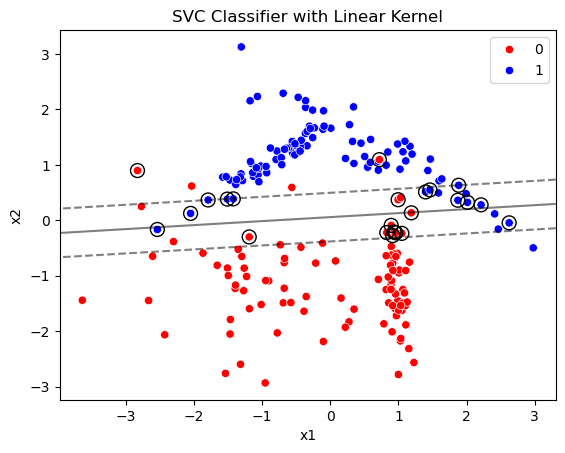

In [8]:
plot_classifier(X,y,"SVC Classifier with Linear Kernel","svc_linear_kernel",clf,sv=1)

In [9]:
# For p.5 question #1
print(f"Class labels: {clf.classes_}\nNumber of support vectors for each class: {clf.n_support_}")

Class labels: [0 1]
Number of support vectors for each class: [11 12]


In [10]:
# For p.5 question #2
for i in [0.0001, 0.01, 2, 10, 100, 1000]:
    test_clf = SVC(kernel='linear', C=i)    # Default value of C=1
    test_clf.fit(X_train, y_train)
    print(f"The accuracy of the classifier where C = {i} is:\nTraining: {test_clf.score(X_train, y_train)}\nTest:{test_clf.score(X_test,y_test)}\n")

The accuracy of the classifier where C = 0.0001 is:
Training: 0.5133333333333333
Test:0.48

The accuracy of the classifier where C = 0.01 is:
Training: 0.96
Test:0.88

The accuracy of the classifier where C = 2 is:
Training: 0.9666666666666667
Test:0.86

The accuracy of the classifier where C = 10 is:
Training: 0.9666666666666667
Test:0.86

The accuracy of the classifier where C = 100 is:
Training: 0.9666666666666667
Test:0.86

The accuracy of the classifier where C = 1000 is:
Training: 0.9666666666666667
Test:0.86



In [11]:
# For p.5 question #3
clf.dual_coef_

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        ,  1.        ,  1.        ,  1.        ,  0.44506752,
         1.        ,  1.        ,  1.        ,  1.        ,  0.55493248,
         1.        ,  1.        ,  1.        ]])

### Questions page 5
1. There are 11 support vectors for class 0 and 12 support vectors for class 1. If the data were linearly separable we'd expect to see fewer support vectors because we could use a hard margin SVM and not worry about non-margin support vectors. Theoretically, we could end up with 2 support vecotrs in linearly separable data because we only need 1 for each class.
2. Changing the value of C changes the upper-bound of the dual coefficient. A small value for C maximizes the margin at the expense of more classification errors while a large C places more emphasis on minimizing the classification error at the expense of a smaller margin. Using C=1 as the baseline, increasing the C parameter betwen 2 and 1000 doesn't affect the training or test error. It seems there is an optimal hyperplane that's found where the error cannot be minimized more. Decreasing the value of C between 0.0001 and 0.01 changes the accuracy of the classifier which shows that with a slightly larger margin (C=0.01, test accuracy 0.02 better) the model generalizes better, but increasing the margin too much (C=0.01, test accuracy 0.38 worse) allows too many misclassifications.
3. There are two types of dual coefficient support vectors and the coefficients are bounded by the zero and the value of C, hence no values greater than $\pm1$. If the number magnitude is equal to 1, the support vector corresponding to the dual coefficient is a non-margin support vector while a number with magnitude less than one is a margin support vector. 
4. With the dual coefficients, the vector $\vec{w}$ is defined in terms of the support vector: $\sum_{SV} \; y_n\alpha_n\vec{x}_n$. Otherwise, the form of the discriminant function is the same: $g(\vec{x}) = \sum_{SV} \; y_n\alpha_n\langle\vec{x}_n,\vec{x}\rangle + b$.

# Nonlinear SVMs

## Polynomial Kernel

In [12]:
def non_linear_svm(degrees):
    poly_kernel = SVC(kernel='poly', degree=degrees)
    poly_kernel.fit(X_train, y_train)
    print(f"This output is for degree: {degrees}")
    print(f"The accuracy of the polynomial degree {degrees} classifier is:")
    print(f"Training: {poly_kernel.score(X_train, y_train)}\nTest:{poly_kernel.score(X_test,y_test)}")
    plot_classifier(X,y,f"SVC Classifier with Polynomial Kernel Degree {degrees}",f"svc_polynomial_degree_{degrees}",poly_kernel,sv=1)
    print(f"Class labels: {poly_kernel.classes_}\nNumber of support vectors for each class: {poly_kernel.n_support_}")

This output is for degree: 3
The accuracy of the polynomial degree 3 classifier is:
Training: 0.9666666666666667
Test:0.9
Class labels: [0 1]
Number of support vectors for each class: [23 24]


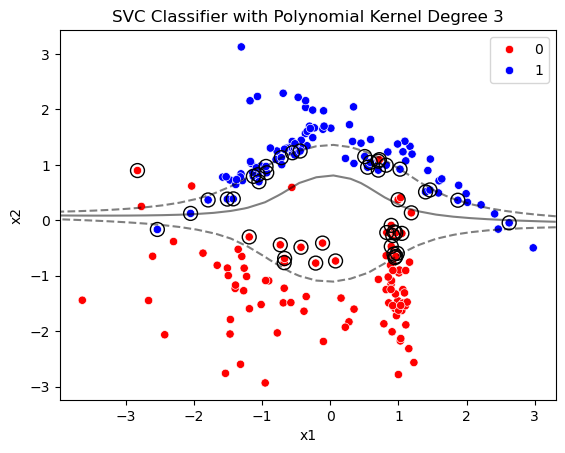

In [13]:
non_linear_svm(3)

This output is for degree: 2
The accuracy of the polynomial degree 2 classifier is:
Training: 0.49333333333333335
Test:0.46
Class labels: [0 1]
Number of support vectors for each class: [74 73]


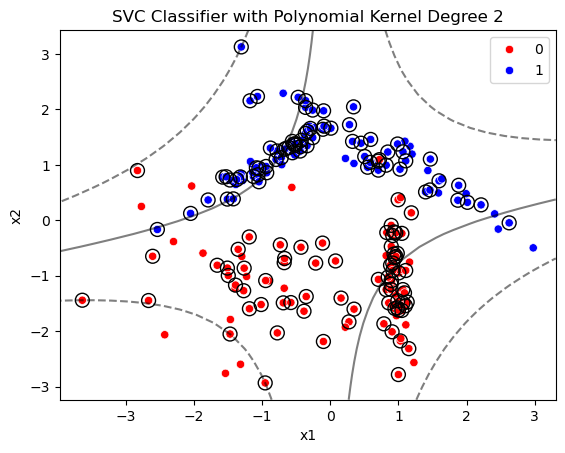

In [14]:
non_linear_svm(2)

This output is for degree: 5
The accuracy of the polynomial degree 5 classifier is:
Training: 0.94
Test:0.96
Class labels: [0 1]
Number of support vectors for each class: [34 36]


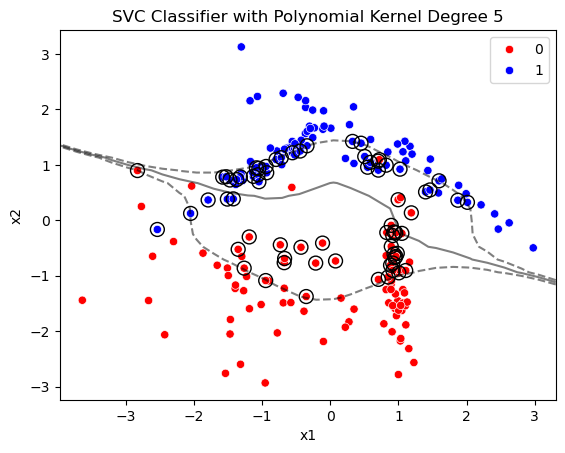

In [15]:
non_linear_svm(5)

This output is for degree: 9
The accuracy of the polynomial degree 9 classifier is:
Training: 0.78
Test:0.8
Class labels: [0 1]
Number of support vectors for each class: [43 42]


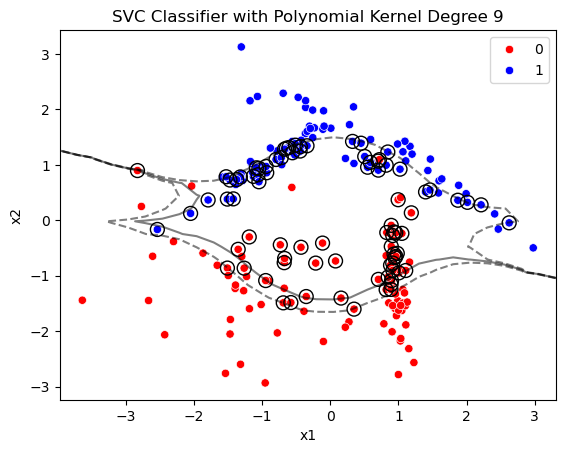

In [16]:
non_linear_svm(9)

### Questions p.5

1. To evaluate the effect of the polynomial kernel, I left the value of C as the default. I tested the polynomial kernel with degrees of 2, 3, 5, and 9. I chose to test the polynomial kernel with higher odd degrees because the quadratic kernel performed poorly and the way the data looked. This would violate the data snooping condition.
2. The classifier performance is shown below. Observing the plots, as the polynomial degree increases the margins become smaller and the decision boundary becomes sharper.
| Polynomial Degrees | Test Data Accuracy | Training Data Accuracy |
| :-: | :-: | :-: |
| 2 | 0.46 | 0.49 |
| 3 | 0.90 | 0.97 |
| 5 | 0.96 | 0.94 |
| 9 | 0.80 | 0.78 |

3. The support vectors for each class are shown in the table below. Compared to the linear SVM all polynomial kernels have a higher number of support vectors. For the polynomial kernel of degree 2, the total number of support vectors is 147, which defeats the purpose of the memory efficient benefits of SVMs using only the support vectors instead of the whole dataset in the decision function.
| Model | Class 0 Support Vectors | Class 1 Support Vectors |
| :-: | :-: | :-: |
| Linear | 11 | 12 |
| Polynomial Degree 2 | 74 | 73 |
| Polynomial Degree 3 | 23 | 24 |
| Polynomial Degree 5 | 34 | 36 |
| Polynomial Degree 9 | 43 | 42 |

4. For reference, the performance of the linear classifier was 0.86 and 0.97 for the test and training data, respectively. Compared to the polynomial kernels, the linear classifier significantly outperforms the degree 2 classifer and holds up well against the degree 3 and 9 classifiers. The degree 5 classifier is 0.1 better; however, we would have to weigh whether the increased complexity of the model is worth this small increase in accuracy.

## Gaussian Kernel

In [17]:
def gaussian_svm(gamma_p):
    rbf_kernel = SVC(kernel='rbf', gamma = gamma_p)
    rbf_kernel.fit(X_train, y_train)
    print(f"This output is Gaussian, gamma: {gamma_p}")
    print(f"The outputs are for the Gaussian kernel with gamma {gamma_p}:")
    print(f"Training: {rbf_kernel.score(X_train, y_train)}\nTest:{rbf_kernel.score(X_test,y_test)}")
    plot_classifier(X,y,f"SVC Classifier with Gaussian Kernel Gamma {gamma_p}",f"svc_guassian_gamma_{gamma_p}",rbf_kernel,sv=1)
    print(f"Class labels: {rbf_kernel.classes_}\nNumber of support vectors for each class: {rbf_kernel.n_support_}")

This output is Gaussian, gamma: scale
The outputs are for the Gaussian kernel with gamma scale:
Training: 0.98
Test:0.92
Class labels: [0 1]
Number of support vectors for each class: [14 15]


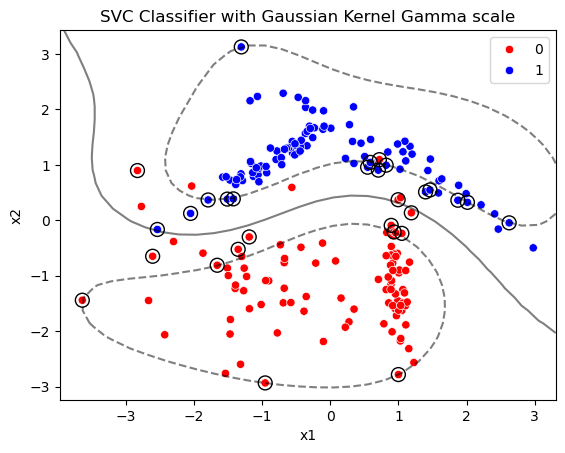

In [18]:
gaussian_svm('scale')

This output is Gaussian, gamma: auto
The outputs are for the Gaussian kernel with gamma auto:
Training: 0.98
Test:0.92
Class labels: [0 1]
Number of support vectors for each class: [15 15]


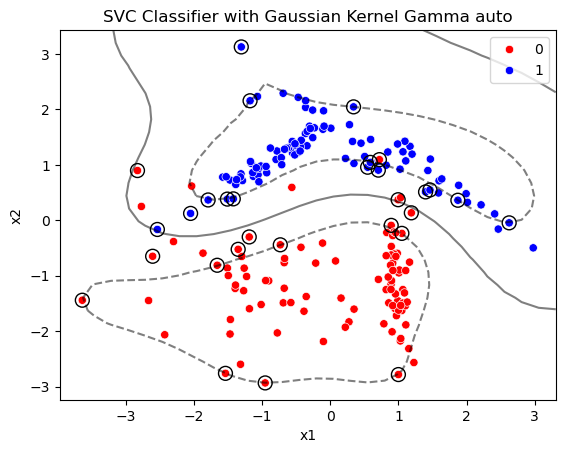

In [19]:
gaussian_svm('auto')

This output is Gaussian, gamma: 1
The outputs are for the Gaussian kernel with gamma 1:
Training: 0.9933333333333333
Test:0.9
Class labels: [0 1]
Number of support vectors for each class: [19 16]


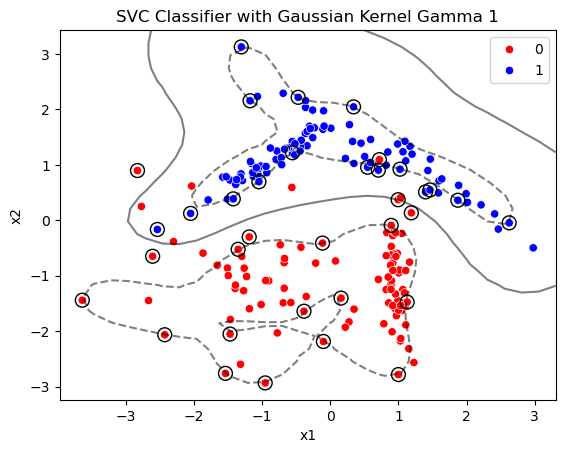

In [20]:
gaussian_svm(1)

This output is Gaussian, gamma: 3
The outputs are for the Gaussian kernel with gamma 3:
Training: 0.9933333333333333
Test:0.92
Class labels: [0 1]
Number of support vectors for each class: [35 25]


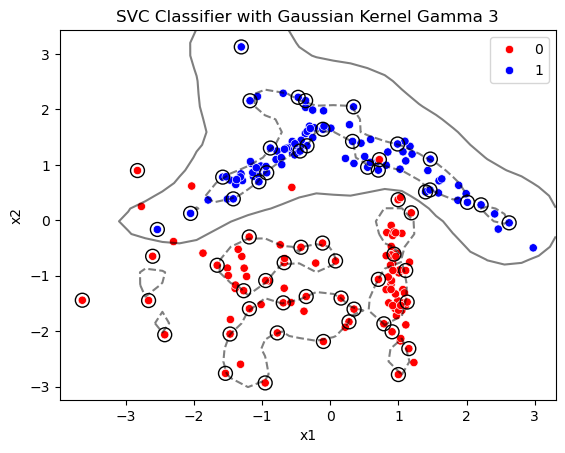

In [21]:
gaussian_svm(3)

## Cancer Data Set ##

In [22]:
from sklearn.datasets import load_breast_cancer
#Load Cancer Data Set
cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_targets = cancer.target

In [23]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Linear Soft Margin SVM Experiment p.7

#### Scaling decision: Question p. 6
To scale the data, we first split the dataset into train-test examples. Then we find the scaling parameters using the training feature vector. Once we have the scaling parameters, we use them to scale both the training and test datasets, "[a]s with all the transformations, it is important to fit the scalers to the training data only, not the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and the new data)." (Geron, p.70). This corresponds to method #2. One reason we do this is to avoid data leakage (information from outside the training set is used in model creation) in model construction.

In [24]:
# split data with a test size of 0.25, slightly larger than default because data are small
# Reminder 0 = malignant, 1 = benign
cancer_x_train, cancer_x_test, cancer_y_train, cancer_y_test = train_test_split(cancer_data, cancer_targets, test_size = 0.25, random_state=42)
stand_scaler = StandardScaler()
stand_scaler.fit(cancer_x_train)

cancer_x_train = stand_scaler.transform(cancer_x_train)
cancer_x_test = stand_scaler.transform(cancer_x_test)

In [25]:
# design linear soft margin C = 1
# decided to use SVC with a linear kernel instead of linearSVC because loss function of for SVC is the 
# standard hinge loss from class while linearSVC is a squared loss. Additionally, with the small
# dataset size SVC should not have a time complexity issue
# there are also more attributes in the SVC class
linear_svc = SVC(kernel='linear', C=1.0)
linear_svc.fit(cancer_x_train,cancer_y_train)
print(f"The test accuracy is: {linear_svc.score(cancer_x_test,cancer_y_test)}")
print(f"The training accuracy is: {linear_svc.score(cancer_x_train,cancer_y_train)}")
print(f"The number of support vectors per class is: {linear_svc.classes_} {linear_svc.n_support_}")

The test accuracy is: 0.972027972027972
The training accuracy is: 0.9929577464788732
The number of support vectors per class is: [0 1] [17 17]


The soft margin linear SVM with C equal to 1 has a test accuracy of 0.97 and a train accuracy of 0.99. These accuracies are very high and very close to one another. This indicates that the data are close to being linearly separable and the model seems to generalize well. In addition, due to the high performance we may consider staying in the linear space instead of projecting the feature space to a higher dimension. A caveat to this is that the dataset is slightly imbalanced, malignant tumors account for 37% of the data, and the cost for misclassification of a malignant tumor as benign is extemely large. This means we should use a confusion matrix to double check the accuracy, as shown below. The robustness of the predictions by class gives me confidence this would be a good classifier. The malignant class has 17 support vectors and the benign class has 17 support vectors. For values of C below 1, where we look to maximize the margin the test accuracy is 0.007 percentage points better than the default and for values of C above 1, where we look to minimize classification errors and construct a smaller margin, the test accuracy degrades slightly. Overall, changing the value of C doesn't change the classifier performance.

In [26]:
for i in [0.01,0.1,10,100]:
    linear_svc = SVC(kernel='linear', C=i)
    linear_svc.fit(cancer_x_train,cancer_y_train)
    print(f"These accuracies are for C = {i}")
    print(f"The test accuracy is: {linear_svc.score(cancer_x_test,cancer_y_test)}")
    print(f"The training accuracy is: {linear_svc.score(cancer_x_train,cancer_y_train)}")
    print()

These accuracies are for C = 0.01
The test accuracy is: 0.9790209790209791
The training accuracy is: 0.9671361502347418

These accuracies are for C = 0.1
The test accuracy is: 0.9790209790209791
The training accuracy is: 0.9835680751173709

These accuracies are for C = 10
The test accuracy is: 0.958041958041958
The training accuracy is: 0.9929577464788732

These accuracies are for C = 100
The test accuracy is: 0.9300699300699301
The training accuracy is: 0.9976525821596244



The F1 score is: 0.9411764705882353


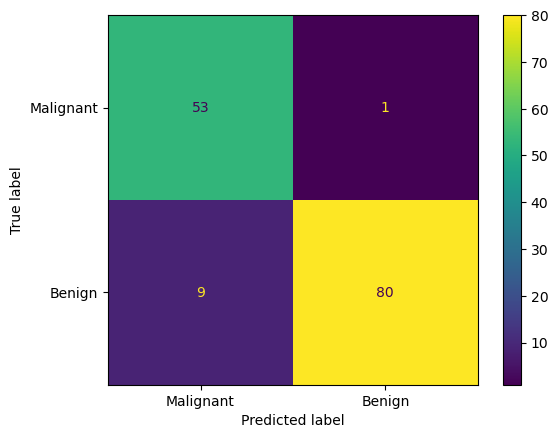

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# use test dataset to create array of predicted outputs
y_pred = linear_svc.predict(cancer_x_test)
labels = ["Malignant", "Benign"]
# confusion_matrix(y_true, y_pred): compare classified test data to predicted test
cm = confusion_matrix(cancer_y_test, y_pred)
print(f"The F1 score is: {f1_score(cancer_y_test, y_pred)}")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot().figure_.savefig('SVC_linear_kernel_c_1_cancer.png')


In [28]:
def gaussian_cancer(gamma_p, c_p):
    rbf_kernel = SVC(kernel='rbf', gamma = gamma_p, C = c_p)
    rbf_kernel.fit(cancer_x_train,cancer_y_train)
    print(f"This output is Gaussian; gamma: {gamma_p}, C: {c_p}")
    print(f"Training: {rbf_kernel.score(cancer_x_train, cancer_y_train)}\nTest:{rbf_kernel.score(cancer_x_test,cancer_y_test)}")
    print(f"Number of features: {rbf_kernel.n_features_in_}")
    print()

In [29]:
# default
gaussian_cancer('scale',1.0)

# scale
gaussian_cancer('auto',1.0)

# gamma = 1
for i in [0.01, 0.1, 1]:
    gaussian_cancer(i,1.0)

This output is Gaussian; gamma: scale, C: 1.0
Training: 0.9882629107981221
Test:0.972027972027972
Number of features: 30

This output is Gaussian; gamma: auto, C: 1.0
Training: 0.9882629107981221
Test:0.972027972027972
Number of features: 30

This output is Gaussian; gamma: 0.01, C: 1.0
Training: 0.9741784037558685
Test:0.9790209790209791
Number of features: 30

This output is Gaussian; gamma: 0.1, C: 1.0
Training: 0.9929577464788732
Test:0.958041958041958
Number of features: 30

This output is Gaussian; gamma: 1, C: 1.0
Training: 1.0
Test:0.6293706293706294
Number of features: 30



### Nonlinear SVM Questions at p.7 

The performance of the Guassian kernel classifier with the default values of gamma and C, scale and 1.0 respectively, is 0.988 on the training data and 0.972 on the test data. I don't believe these results indicate under or over fitting the model because both the train and test accuracy are very high. Setting gamma to auto we use the value of 1 / n_features which corresponds to 0.033. This classifier performs identically to the default gamma of scale. I believe this is the case because gamma = 'scale' uses 1 / (n_features * X.var()), but we scaled the variance of the features to equal 1. For gamma 0.01, the training error is slightly lower, but the test error is the same. For gamma 0.1, the training error is almost zero, however, the test accuracy has started to decline which indicates we've begun overfitting. Finally, with gamma equal to 1 the model is severely overfit. From these changes, it seems the default value of gamma is desirable. 

### Using only two features ###

Here is a line of code that will create a new data set containing only feature 24 and 28,

In [30]:
cancer_data_2f=np.column_stack((cancer_data[:,[23]],cancer_data[:,[27]]))

In [31]:
can_2f_x_train, can_2f_x_test, can_2f_y_train, can_2f_y_test = train_test_split(cancer_data_2f, \
                                                                                cancer_targets, test_size = 0.25, random_state=42)
stand_scaler_2f = StandardScaler()
stand_scaler_2f.fit(can_2f_x_train)

can_2f_x_train, can_2f_x_test = stand_scaler_2f.transform(can_2f_x_train), stand_scaler_2f.transform(can_2f_x_test)

The test accuracy is: 0.965034965034965
The training accuracy is: 0.9389671361502347
The F1 score is: 0.9710982658959537


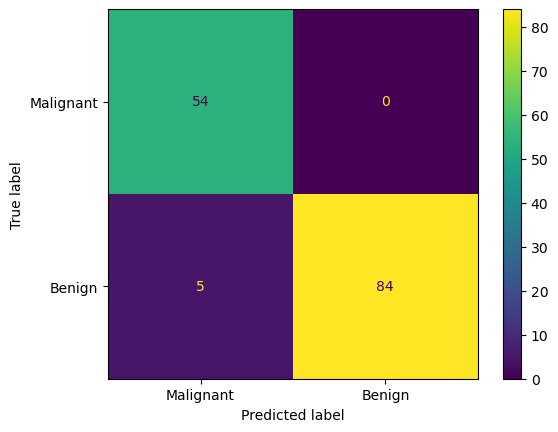

In [33]:
# Based on the observation above that the data are slightly imbalanced and there is a difference in 
# risk based on misclassification errors I applied the class_weight = balanced to the algo.
# With a subject matter expert I may more heavily weight the cancer observations
# because these are such high risk events.
# The test accuracy of this classifier is 0.965 which is slightly lower than the original 
# linear SVM accuracy of 0.972; however, 
# this classifier does not make any mistakes misclassifying malignant tumors and reduces 
# dimensionality from 30 to 2.
linear_svc_2f = SVC(kernel='linear', C=1.0, class_weight = 'balanced')
linear_svc_2f.fit(can_2f_x_train,can_2f_y_train)
print(f"The test accuracy is: {linear_svc_2f.score(can_2f_x_test,can_2f_y_test)}")
print(f"The training accuracy is: {linear_svc_2f.score(can_2f_x_train,can_2f_y_train)}")
# print(f"The number of support vectors per class is: {linear_svc_2f.classes_} {linear_svc_2f.n_support_}")

# use test dataset to create array of predicted outputs
y_pred_2f = linear_svc_2f.predict(can_2f_x_test)
labels = ["Malignant", "Benign"]
# confusion_matrix(y_true, y_pred): compare classified test data to predicted test
cm = confusion_matrix(can_2f_y_test, y_pred_2f)
print(f"The F1 score is: {f1_score(can_2f_y_test, y_pred_2f)}")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot().figure_.savefig('SVC_linear_kernel_cancer_2f.png')

The number of support vectors per class is: [0 1] [28 47]


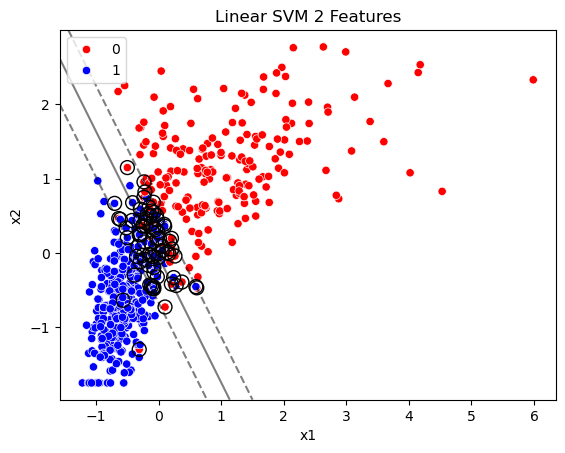

In [34]:
print(f"The number of support vectors per class is: {linear_svc_2f.classes_} {linear_svc_2f.n_support_}")
to_plot_x = stand_scaler_2f.transform(cancer_data_2f)
plot_classifier(to_plot_x, cancer_targets, "Linear SVM 2 Features","lin_svm_2f_cancer",linear_svc_2f,sv=1)

The test accuracy is: 0.9230769230769231
The training accuracy is: 0.9084507042253521


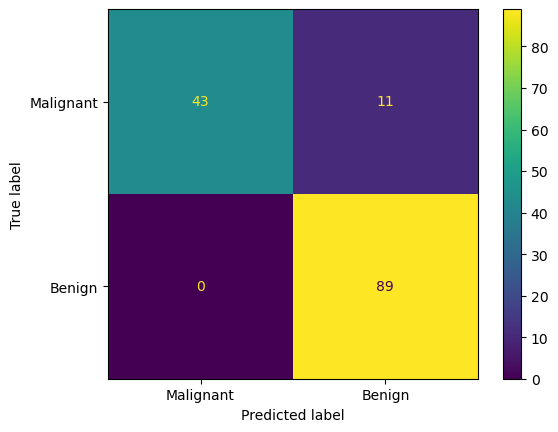

In [35]:
poly_svc_2f = SVC(kernel='poly', C=1.0, degree = 3)
poly_svc_2f.fit(can_2f_x_train,can_2f_y_train)
print(f"The test accuracy is: {poly_svc_2f.score(can_2f_x_test,can_2f_y_test)}")
print(f"The training accuracy is: {poly_svc_2f.score(can_2f_x_train,can_2f_y_train)}")
# print(f"The number of support vectors per class is: {linear_svc_2f.classes_} {linear_svc_2f.n_support_}")

# use test dataset to create array of predicted outputs
y_pred_2f = poly_svc_2f.predict(can_2f_x_test)
labels = ["Malignant", "Benign"]
# confusion_matrix(y_true, y_pred): compare classified test data to predicted test
cm = confusion_matrix(can_2f_y_test, y_pred_2f)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

The test accuracy is: 0.958041958041958
The training accuracy is: 0.9507042253521126


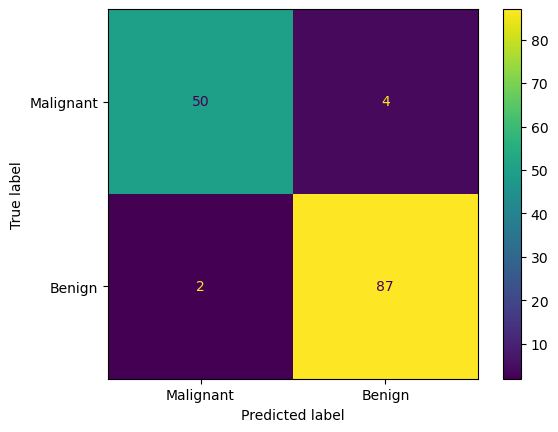

In [37]:
rbf_svc_2f = SVC(kernel='rbf', C=1.0)
rbf_svc_2f.fit(can_2f_x_train,can_2f_y_train)
print(f"The test accuracy is: {rbf_svc_2f.score(can_2f_x_test,can_2f_y_test)}")
print(f"The training accuracy is: {rbf_svc_2f.score(can_2f_x_train,can_2f_y_train)}")
# print(f"The number of support vectors per class is: {linear_svc_2f.classes_} {linear_svc_2f.n_support_}")

# use test dataset to create array of predicted outputs
y_pred_2f = rbf_svc_2f.predict(can_2f_x_test)
labels = ["Malignant", "Benign"]
# confusion_matrix(y_true, y_pred): compare classified test data to predicted test
cm = confusion_matrix(can_2f_y_test, y_pred_2f)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

### Final Analysis p.8
I believe we should use the linear kernel, balanced class weight model with the reduced dataset using features 24 and 28. This model has a test accuracy of 96.5 percent which is within 1 percentage point of the best Gaussian and linear kernel SVMs, but with a few additional benefits. Overall, the preferred model only relies on 2 features which greatly reduces the computational load and training time compared to either of the other models. With respect to the Gaussian kernel, the linear kernel is a much simpler methodology which will allow the model to generalize better. With respect to the other linear kernel, this model does not make the error of classifying a malignant tumor as benign and has an F1 score of 97.1 compared to 94.1 for the other linear kernel model.